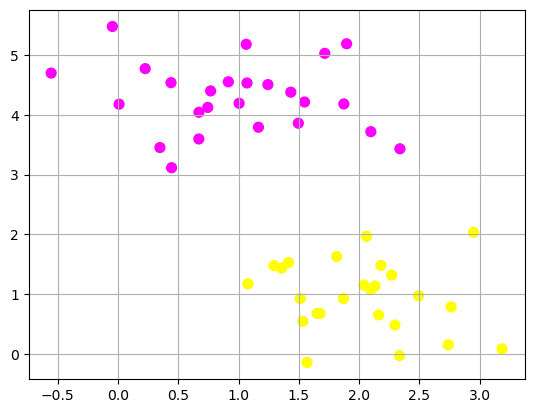

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
plt.grid()

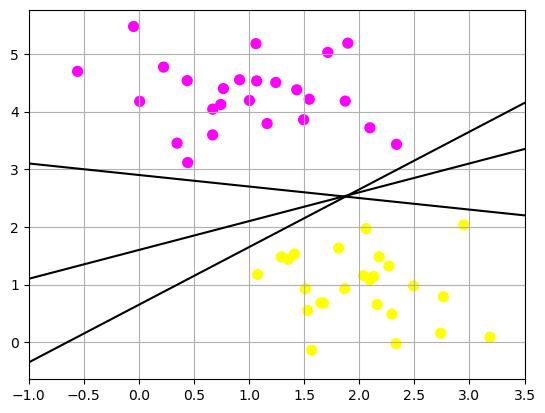

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")

for m, b in ((1, .65), (.5, 1.6), (-.2, 2.9)):
    plt.plot(xfit, m * xfit + b, "-k")

plt.xlim(-1, 3.5)
plt.grid()

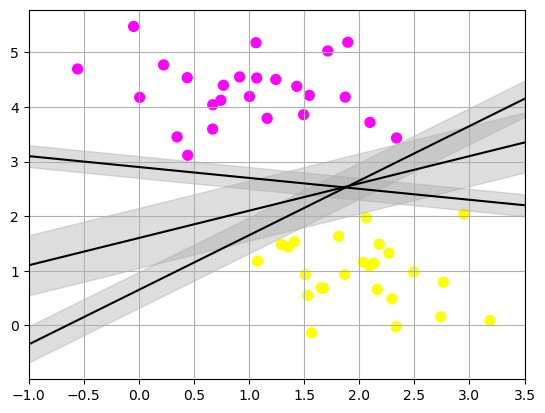

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")

for m, b, d in ((1, .65, .33), (.5, 1.6, .55), (-.2, 2.9, .2)):
    yfit = m * xfit + b
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(
        xfit,
        yfit - d,
        yfit + d,
        edgecolor="none",
        color="#AAAAAA",
        alpha=.4
    )

plt.xlim(-1, 3.5)
plt.grid()

In [10]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X, y)

SVC(kernel='linear')

In [11]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(
        X,
        Y,
        P,
        colors="k",
        levels=[-1, 0, 1],
        alpha=.5,
        linestyles=["--", "-", "--"]
    )
    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=200,
            linewidth=.75,
            facecolors="none",
            edgecolors="black"
        )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

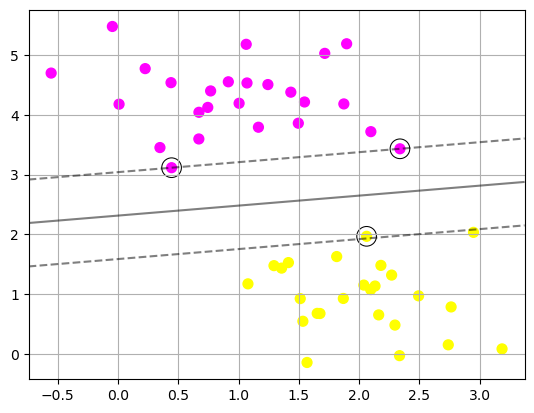

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
plot_svc_decision_function(clf)
plt.grid()

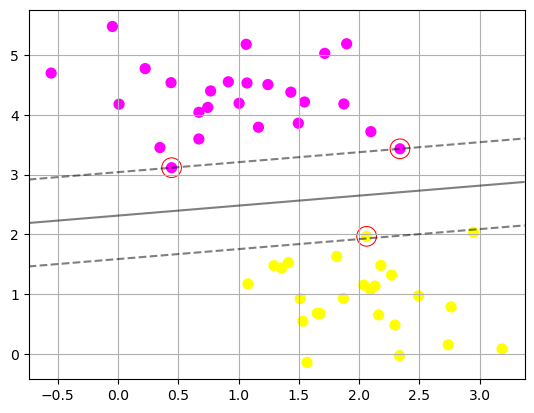

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
plot_svc_decision_function(clf, plot_support=False)
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=200,
    linewidth=.75,
    facecolors="none",
    edgecolors="red"
)
plt.grid()

In [16]:
from ipywidgets import interact

def plot_svm(N, svc_C):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=.6)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel="linear", C=svc_C)
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=200,
        linewidth=.75,
        facecolors="none",
        edgecolors="red"
    )

    plt.grid()


interact(plot_svm, N=[50, 100, 150, 200], svc_C=(.1, 10))

interactive(children=(Dropdown(description='N', options=(50, 100, 150, 200), value=50), FloatSlider(value=5.05…

<function __main__.plot_svm(N, svc_C)>

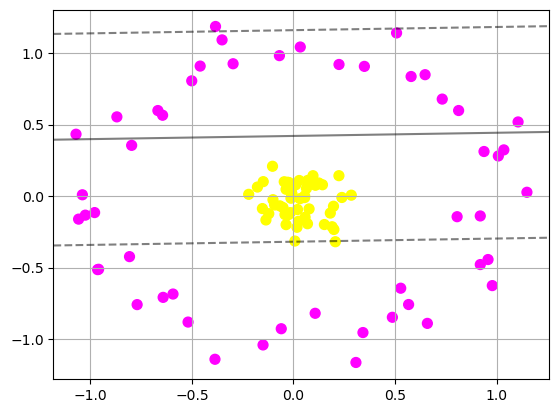

In [17]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel="linear").fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
plot_svc_decision_function(clf, plot_support=False)
plt.grid()

In [18]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

In [20]:
from mpl_toolkits import mplot3d


def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


interact(plot_3D, elev=[-90, -45, 45, 90], azim=(-180, 180))

interactive(children=(Dropdown(description='elev', options=(-90, -45, 45, 90), value=-90), IntSlider(value=30,…

<function __main__.plot_3D(elev=30, azim=30)>

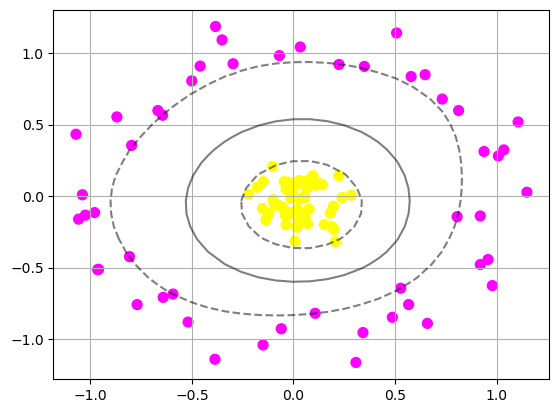

In [21]:
clf = SVC(kernel="rbf", C=10)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
plot_svc_decision_function(clf, plot_support=False)
plt.grid()